# Importing libraries

In [188]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [2]:
# Read cvs file and display information
path = 'D:/Projects for my GitLab/kaggle_project/weatherHistory.csv'
data = pd.read_csv(path)
display(data.head())
display(data.info())

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


None

In [3]:
# Separating the types of weather
weather_type = data['Summary'].value_counts()
display(weather_type)
display(weather_type.count())

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

27

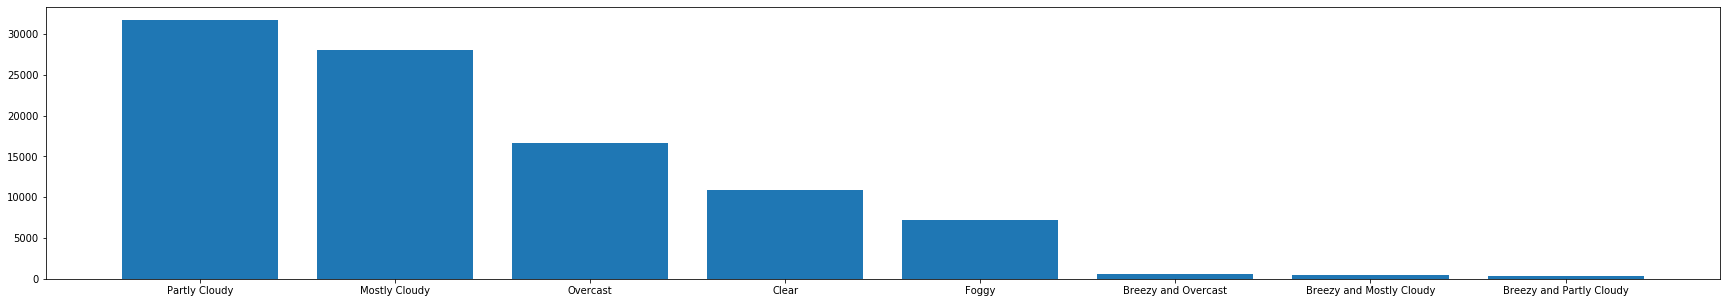

In [4]:
# Plotting the most repeated types of weather
weather_type = weather_type[weather_type>100]
plt.figure(figsize=(30,5))
plt.bar(weather_type.index, weather_type.values)
plt.show()

In [5]:
# Showing temperature's values based on the types of weather
data.pivot_table(index = 'Summary', columns='Formatted Date', values='Temperature (C)')

Formatted Date,2006-01-01 00:00:00.000 +0100,2006-01-01 01:00:00.000 +0100,2006-01-01 02:00:00.000 +0100,2006-01-01 03:00:00.000 +0100,2006-01-01 04:00:00.000 +0100,2006-01-01 05:00:00.000 +0100,2006-01-01 06:00:00.000 +0100,2006-01-01 07:00:00.000 +0100,2006-01-01 08:00:00.000 +0100,2006-01-01 09:00:00.000 +0100,...,2016-12-31 14:00:00.000 +0100,2016-12-31 15:00:00.000 +0100,2016-12-31 16:00:00.000 +0100,2016-12-31 17:00:00.000 +0100,2016-12-31 18:00:00.000 +0100,2016-12-31 19:00:00.000 +0100,2016-12-31 20:00:00.000 +0100,2016-12-31 21:00:00.000 +0100,2016-12-31 22:00:00.000 +0100,2016-12-31 23:00:00.000 +0100
Summary,,,,,,,,,,,,,,,,,,,,,
Breezy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Breezy and Dry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Breezy and Foggy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Breezy and Mostly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Breezy and Overcast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Breezy and Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dangerously Windy and Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drizzle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# we want to categorize temperature based on weather types
# build a dictionary to group temp and weather
# first of all, we need to change the type of time because time might not be sorted, so  data should be sorted by time 
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])
data.sort_values(by=['Formatted Date'], inplace=True)

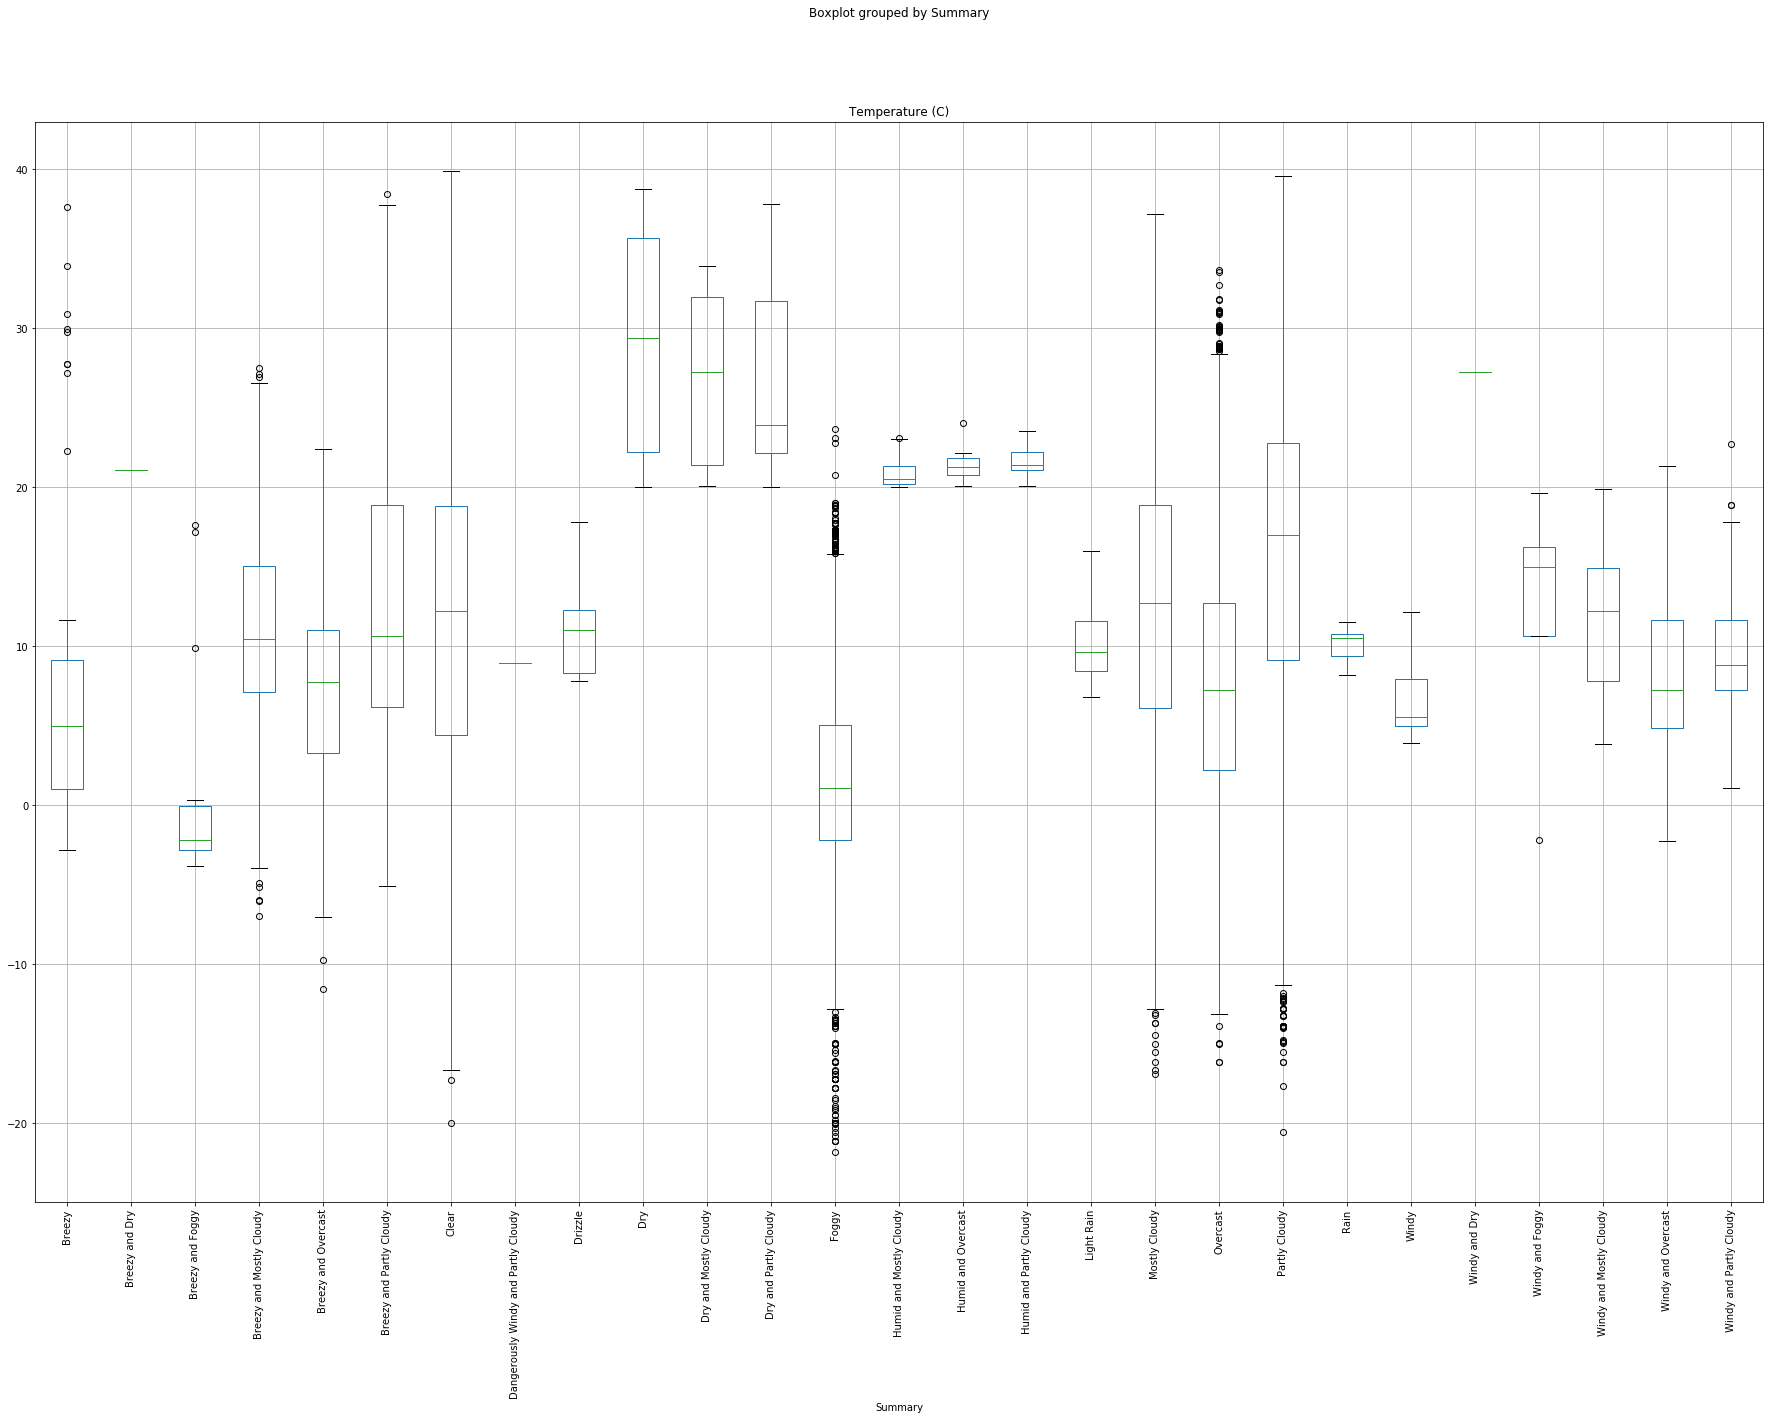

In [7]:
# plotting temperature based on the weather by boxplot
# we can see outliers using 
data.boxplot(column='Temperature (C)', by='Summary', rot=90, fontsize=10, figsize=(30,20))
plt.show()

In [8]:
# standarize variables
Tm = data['Temperature (C)'].max()
T = data['Temperature (C)'].apply(lambda x: x/Tm)

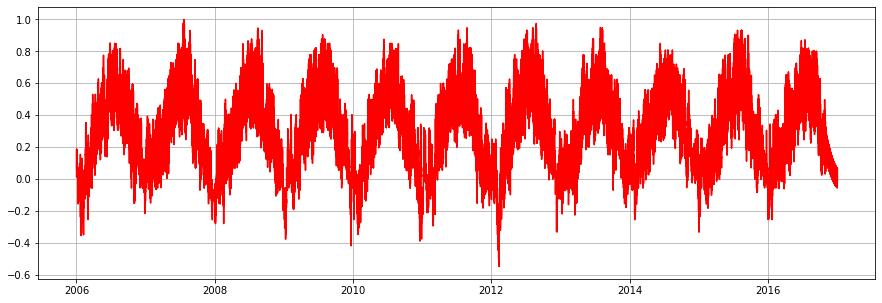

In [9]:
# we can see changing of temp 
plt.figure(figsize=(15,5))
plt.plot(data['Formatted Date'], T, '-r')
plt.grid()
plt.show()

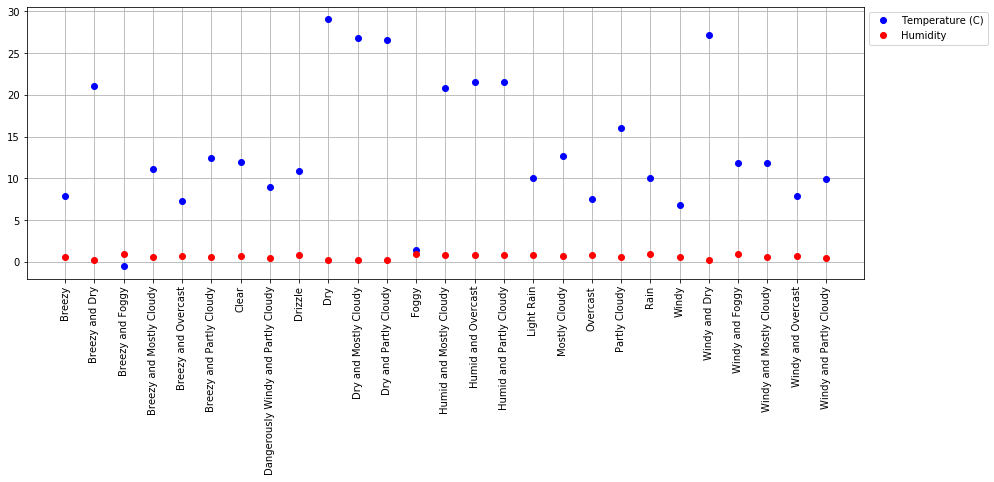

In [10]:
# Visualizing the changes Temp and Humidity based on the weather types
f = plt.figure(figsize=(15,5))
ST = data[['Summary','Temperature (C)']].groupby('Summary').mean()
SH = data[['Summary','Humidity']].groupby('Summary').mean()
ax = f.add_subplot(111)
ax.set_xticklabels(ST.index, rotation = 90)
ax.plot(ST,'ob')
ax.plot(SH,'or')
ax.grid()
ax.legend(['Temperature (C)', 'Humidity'],loc="upper left", bbox_to_anchor=(1,1))
plt.show()

# Linear Regression between Temp and Humidity

In [16]:
# setting up x and y for regression

x = np.array(data['Temperature (C)']).reshape(-1,1)
y = np.array(data['Humidity']).reshape(-1,1)

display(x.shape)
display(y.shape)

(96453, 1)

(96453, 1)

In [17]:
# Separating train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [46]:
# Set up the model
model = sm.OLS(x_train, y_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.427
Model:                            OLS   Adj. R-squared (uncentered):              0.427
Method:                 Least Squares   F-statistic:                          5.031e+04
Date:                Thu, 18 Jun 2020   Prob (F-statistic):                        0.00
Time:                        09:48:35   Log-Likelihood:                     -2.6124e+05
No. Observations:               67517   AIC:                                  5.225e+05
Df Residuals:                   67516   BIC:                                  5.225e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            13.1645      0.059    224.291      0.000      13.049      13.279
==============================================================================
Omnibus:                     2358.735   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1791.056
Skew:                           0.309   Prob(JB):                         0.00
Kurtosis:                       2.494   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Checking the results of the model
display(results.rsquared)
display(results.params)
display(results.fittedvalues)

0.4269680621923011

array([13.16445432])

array([12.11129797,  7.24044987,  8.16196168, ...,  5.00249264,
       11.45307525, 11.45307525])

In [52]:
# Prediction of the model
y_pred = results.predict(x_test)
display(y_pred)

array([ 14.04208461, -80.81512233, 227.08683694, ..., 345.05497476,
        80.44944304, 226.06293491])